# Pandas 4 - Time Series
#### Lehner White

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

### Problem 1:

In [2]:
s = pd.Series.from_csv('DJIA.csv')
s = s.replace(to_replace='.', value=np.nan)
s = s[1:].astype(np.float64)
s.index = pd.to_datetime(s.index)

### Problem 2:

In [3]:
pay = (pd.read_csv('paychecks.csv').values.flatten())
days = pd.date_range(start='2008-03-13', periods=46, freq='WOM-3FRI').union(pd.date_range(start='2008-03-13', periods=46, freq='WOM-1FRI'))
pay = pd.Series(data=pay, index=days)

### Problem 3:

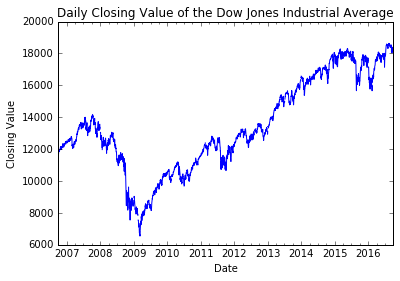

In [4]:
s.plot()
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.title('Daily Closing Value of the Dow Jones Industrial Average')
plt.show()

### Problem 4:

In [5]:
fin_data = pd.read_csv('finances.csv')
Q = pd.period_range("1978-09", periods=84, freq='Q') + 2
fin = pd.DataFrame(fin_data.values, columns=fin_data.columns, index=Q)

### Problem 5:

In [6]:
traf = pd.read_csv('website_traffic.csv')
traf['ENTER'] = pd.to_datetime(traf['ENTER'])
traf['LEAVE'] = pd.to_datetime(traf['LEAVE'])
traf['DURATION'] = traf['LEAVE'] - traf['ENTER']
print('Average visit duration is {}'.format(str(traf['DURATION'].mean())))

traf.index = traf['ENTER']
traf = traf.drop(['ENTER', 'IP', 'LEAVE'], 1)
traf['VISITS'] = 1
print traf.resample('H').sum()


Average visit duration is 0 days 00:05:04.731647
                     VISITS
ENTER                      
2016-10-07 01:00:00     618
2016-10-07 02:00:00     655
2016-10-07 03:00:00     670
2016-10-07 04:00:00     632
2016-10-07 05:00:00     672
2016-10-07 06:00:00     602
2016-10-07 07:00:00     660
2016-10-07 08:00:00     650
2016-10-07 09:00:00     665
2016-10-07 10:00:00     647
2016-10-07 11:00:00     605
2016-10-07 12:00:00     646
2016-10-07 13:00:00     670
2016-10-07 14:00:00     628
2016-10-07 15:00:00     607
2016-10-07 16:00:00     683
2016-10-07 17:00:00     632
2016-10-07 18:00:00     629
2016-10-07 19:00:00     702
2016-10-07 20:00:00     644
2016-10-07 21:00:00     641
2016-10-07 22:00:00     677


### Problem 6:

In [7]:
day_gain = s - s.shift(1)
month_val = s.resample('MS', label='left').first()
month_gain = month_val - month_val.shift(1)

print('Day with the largest gain: {}'.format(str(day_gain.idxmax())))
print('Day with the largest loss: {}'.format(str(day_gain.idxmin())))
print('Month with the largest gain: {}'.format(str(month_gain.idxmax())))
print('Month with the largest loss: {}'.format(str(month_gain.idxmin())))

Day with the largest gain: 2008-10-13 00:00:00
Day with the largest loss: 2008-09-29 00:00:00
Month with the largest gain: 2015-11-01 00:00:00
Month with the largest loss: 2015-09-01 00:00:00


### Problem 7:

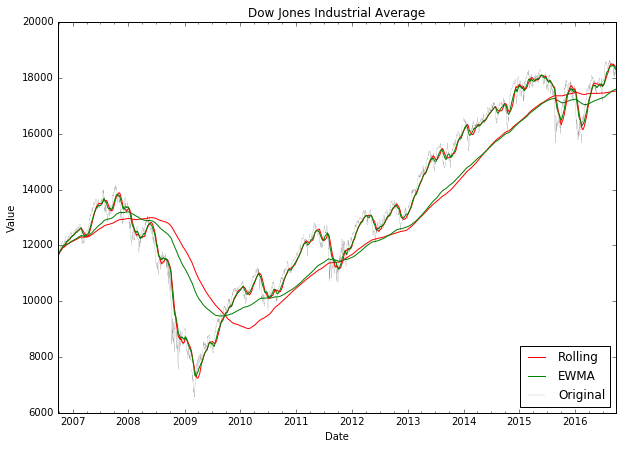

In [8]:
month_avg = s.rolling(30, min_periods=1).mean()
year_avg = s.rolling(365, min_periods=1).mean()

month_ewma = s.ewm(span=30).mean()
year_ewma = s.ewm(span=365).mean()

plt.figure(figsize=(10,7))
plt.title('Dow Jones Industrial Average')
plt.xlabel('Date')
plt.ylabel('Value')
year_avg.plot(color='r', label='Rolling')
year_ewma.plot(color='g', label='EWMA')
s.plot(color='k', label='Original', linewidth=0.1)
month_avg.plot(color='r')
month_ewma.plot(color='g')
plt.legend(['Rolling','EWMA','Original'], loc=4)
plt.show()